In [1]:
#reference:
#https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html

import numpy as np
import pandas as pd
ctg = pd.read_csv('ctg.csv', sep=';')

In [2]:
ctg_pd = pd.DataFrame(ctg)

In [3]:
print(ctg_pd.keys())
print(ctg_pd.shape)

Index(['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS',
       'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median',
       'Variance', 'Tendency', 'CLASS', 'NSP'],
      dtype='object')
(2129, 23)


In [23]:
ctg_pd = ctg_pd.dropna()
ctg_pd['target']=ctg.NSP
ctg_pd.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP,target
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0,2.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0,1.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0,1.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0,1.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0,1.0


In [24]:
print(ctg_pd.describe())
ctg_pd.info()

                LB           AC           FM           UC         ASTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.303857     2.722484     7.241298     3.659925    46.990122   
std       9.840844     3.560850    37.125309     2.847094    17.192814   
min     106.000000     0.000000     0.000000     0.000000    12.000000   
25%     126.000000     0.000000     0.000000     1.000000    32.000000   
50%     133.000000     1.000000     0.000000     3.000000    49.000000   
75%     140.000000     4.000000     2.000000     5.000000    61.000000   
max     160.000000    26.000000   564.000000    23.000000    87.000000   

              MSTV        ALTV         MLTV           DL           DS  ...  \
count  2126.000000  2126.00000  2126.000000  2126.000000  2126.000000  ...   
mean      1.332785     9.84666     8.187629     1.570085     0.003293  ...   
std       0.883241    18.39688     5.628247     2.499229     0.057300  ...   
min       0.200000   

In [25]:
from sklearn.feature_selection import SelectKBest, f_regression

Y = ctg_pd['target'].values
X = ctg_pd[['LB','AC','FM','UC','ASTV','MSTV','ALTV','MLTV','DL','DS','DP','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance','Tendency']]
# ignore 'CLASS' & 'NSP' -> target variable

#Check 3 of the most relevant features
X_reg_new = SelectKBest(score_func = f_regression, k = 3).fit_transform(X,Y)

In [26]:
X_reg_new[:5]

array([[73., 43.,  0.],
       [17.,  0.,  0.],
       [16.,  0.,  0.],
       [16.,  0.,  0.],
       [16.,  0.,  0.]])

In [27]:
ctg_pd.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP,target
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0,2.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0,1.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0,1.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0,1.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0,1.0


In [49]:
#By comparing the output of array with the original set, we found that the relevant features are 
#ASTV (percentage of time with abnormal short term variability), ALTV (percentage of time with abnormal long term variability)
#and DP (# of prolongued decelerations per second)
a = ctg_pd['ASTV'].values
b = ctg_pd['ALTV'].values
c = ctg_pd['DP'].values
a,b,c

(array([73., 17., 16., ..., 79., 78., 74.]),
 array([43.,  0.,  0., ..., 20., 27., 36.]),
 array([0., 0., 0., ..., 0., 0., 0.]))

C:\Users\userr\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\userr\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\userr\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\userr\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


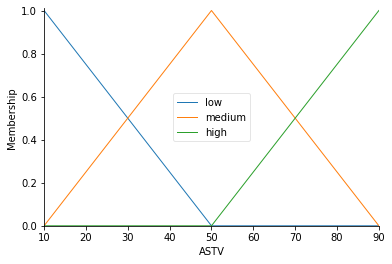

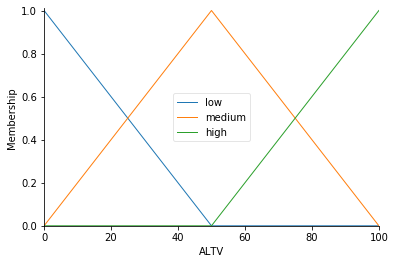

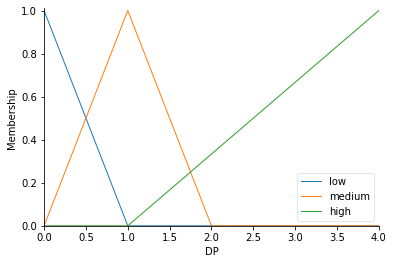

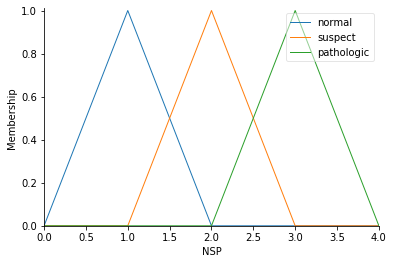

In [118]:
#fuzzy logic model

import skfuzzy as fuzz
import matplotlib.pyplot as plt
import skfuzzy.control as ctrl

# New Antecedent/Consequent objects
x_ASTV = ctrl.Antecedent(np.arange(10, 91, 1), 'ASTV')
x_ALTV = ctrl.Antecedent(np.arange(0, 101, 1), 'ALTV')
x_DP = ctrl.Antecedent(np.arange(0, 5, 1), 'DP')
x_NSP = ctrl.Consequent(np.arange(0, 5, 1), 'NSP')

# Custom membership functions
x_ASTV['low'] = fuzz.trimf(x_ASTV.universe, [10, 10, 50])
x_ASTV['medium'] = fuzz.trimf(x_ASTV.universe, [10, 50, 90])
x_ASTV['high'] = fuzz.trimf(x_ASTV.universe, [50, 90, 90])

x_ALTV['low'] = fuzz.trimf(x_ALTV.universe, [0, 0, 50])
x_ALTV['medium'] = fuzz.trimf(x_ALTV.universe, [0, 50, 100])
x_ALTV['high'] = fuzz.trimf(x_ALTV.universe, [50, 100, 100])

x_DP['low'] = fuzz.trimf(x_DP.universe, [0, 0, 1])
x_DP['medium'] = fuzz.trimf(x_DP.universe, [0, 1, 2])
x_DP['high'] = fuzz.trimf(x_DP.universe, [1, 4, 4])

x_NSP['normal'] = fuzz.trimf(x_NSP.universe, [1, 1, 2])
x_NSP['suspect'] = fuzz.trimf(x_NSP.universe, [1, 2, 3])
x_NSP['pathologic'] = fuzz.trimf(x_NSP.universe, [2, 3, 3])

x_ASTV.view()
x_ALTV.view()
x_DP.view()
x_NSP.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b57d4cce48>)

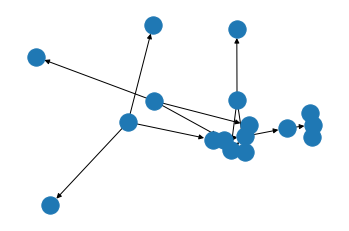

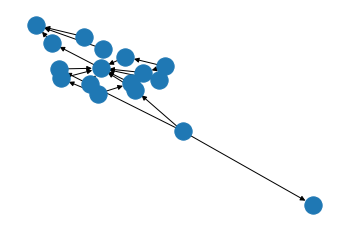

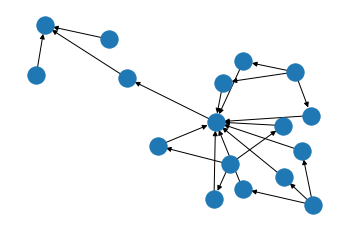

In [121]:
#fuzzy rules
rule1 = ctrl.Rule(antecedent = ((x_ASTV['low']   & x_ALTV['low']    & x_DP['low']) |
                               (x_ASTV['medium'] & x_ALTV['low']    & x_DP['low']) |
                               (x_ASTV['low']    & x_ALTV['medium'] & x_DP['low'])),
                  consequent = x_NSP['normal'])

rule2 = ctrl.Rule(antecedent = ((x_ASTV['high']  & x_ALTV['low']    & x_DP['low'])    |
                               (x_ASTV['low']    & x_ALTV['high']   & x_DP['low'])    |
                               (x_ASTV['medium'] & x_ALTV['medium'] & x_DP['low'])    |
                               (x_ASTV['high']   & x_ALTV['medium'] & x_DP['low'])    |
                               (x_ASTV['medium'] & x_ALTV['high']   & x_DP['low'])    |
                               (x_ASTV['low']    & x_ALTV['low']    & x_DP['medium']) |
                               (x_ASTV['medium'] & x_ALTV['low']    & x_DP['medium']) |
                               (x_ASTV['low']    & x_ALTV['medium'] & x_DP['medium'])),
                  consequent = x_NSP['suspect'])

rule3 = ctrl.Rule(antecedent = ((x_ASTV['high']  & x_ALTV['low']    & x_DP['medium']) |
                               (x_ASTV['low']    & x_ALTV['high']   & x_DP['medium']) |
                               (x_ASTV['medium'] & x_ALTV['medium'] & x_DP['medium']) |
                               (x_ASTV['high']   & x_ALTV['medium'] & x_DP['medium']) |
                               (x_ASTV['medium'] & x_ALTV['high']   & x_DP['medium']) |
                               (x_ASTV['low']    & x_ALTV['low']    & x_DP['high'])   |
                               (x_ASTV['medium'] & x_ALTV['low']    & x_DP['high'])   |
                               (x_ASTV['high']   & x_ALTV['low']    & x_DP['high'])   |
                               (x_ASTV['low']    & x_ALTV['medium'] & x_DP['high'])   |
                               (x_ASTV['low']    & x_ALTV['high']   & x_DP['high'])   |
                               (x_ASTV['medium'] & x_ALTV['medium'] & x_DP['high'])   |
                               (x_ASTV['high']   & x_ALTV['medium'] & x_DP['high'])   |
                               (x_ASTV['medium'] & x_ALTV['high']   & x_DP['high'])   |
                               (x_ASTV['high']   & x_ALTV['high']   & x_DP['low'])    |
                               (x_ASTV['high']   & x_ALTV['high']   & x_DP['medium']) |
                               (x_ASTV['high']   & x_ALTV['high']   & x_DP['high'])),
                  consequent = x_NSP['pathologic'])
                  
rule1.view()
rule2.view()
rule3.view()

In [122]:
system = ctrl.ControlSystem([rule1, rule2, rule3])
simulation = ctrl.ControlSystemSimulation(system)

In [123]:
simulation.input['ASTV'] = a  #20
simulation.input['ALTV'] = b  #0
simulation.input['DP'] = c    #3

simulation.compute()

In [124]:
d = simulation.output['NSP']

#original output
print(d[:10])

#rounded off output
d = np.round(np.array(d))
np.rint(a)
print(d[:10])

#actual target variable
print(Y[:10])
#x_NSP.view(sim=simulation)

[1.77431086 1.         1.         1.         1.         3.
 3.         1.76266042 1.78919492 1.84771474]
[2. 1. 1. 1. 1. 3. 3. 2. 2. 2.]
[2. 1. 1. 1. 1. 3. 3. 3. 3. 3.]


In [126]:
# d= output, Y= initial data
# Performance of fuzzy logic model
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, recall_score, precision_score
print(accuracy_score(Y, d))
print(confusion_matrix(Y, d))
print(classification_report(Y, d))

0.8043273753527752
[[1443  212    0]
 [ 115  177    3]
 [  16   70   90]]
              precision    recall  f1-score   support

         1.0       0.92      0.87      0.89      1655
         2.0       0.39      0.60      0.47       295
         3.0       0.97      0.51      0.67       176

    accuracy                           0.80      2126
   macro avg       0.76      0.66      0.68      2126
weighted avg       0.85      0.80      0.82      2126

